# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# STEP #1: PROBLEM STATEMENT

Develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING DATA

In [14]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv('Bank_Customer_retirement.csv')

In [16]:
df.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [17]:
df.shape

(500, 4)

In [18]:
df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [19]:
df.tail(5)

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


# STEP #3: VISUALIZING THE DATA

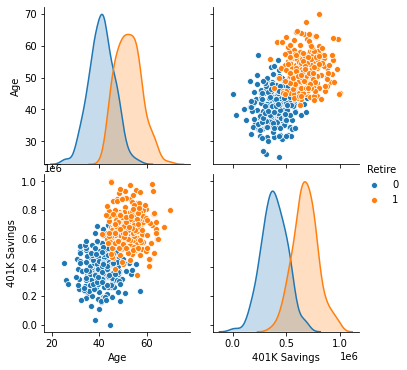

In [20]:
sns.pairplot(df, hue = 'Retire', vars= ['Age', '401K Savings'] )

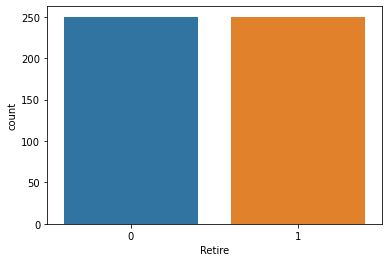

In [21]:
sns.countplot(df['Retire'], label = 'Retirement' )

# STEP #4: MODEL TRAINING 

In [22]:
df = df.drop(['Customer ID'], axis = 1)

In [23]:
# Let's drop the target label coloumns
X = df.drop(['Retire'],axis=1)

In [24]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [25]:
y = df['Retire']

In [26]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [27]:
#splitting the model into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [28]:
X_train.shape

(400, 2)

In [29]:
X_test.shape

(100, 2)

In [30]:
y_train.shape

(400,)

In [31]:
y_test.shape

(100,)

In [32]:
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix

classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

# STEP #5: EVALUATING THE MODEL

In [33]:
y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

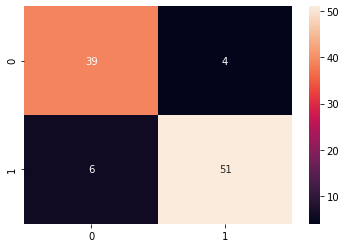

In [34]:
sns.heatmap(cm, annot = True)

In [35]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.93      0.89      0.91        57

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



# STEP #6: IMPROVING THE MODEL

In [50]:
#applying feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [51]:
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix

classifier = SVC()
classifier.fit(X_train_scaled, y_train)

SVC()

In [52]:
y_predict = classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

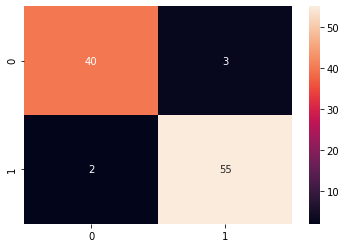

In [53]:
sns.heatmap(cm, annot = True)

In [54]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

